# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)
8.[Ejercicios](#ejercicios)
   1. [Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab](#a)
   1. [Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab](#b)
   1. [Investigar una aplicación de opening y closing e implementalo en Google Colab](#c)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("Rodeo.jpg.webp")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("Rodeo.jpg.webp",0)

(1000, 666, 3) (1000, 666, 3) (1000, 666)


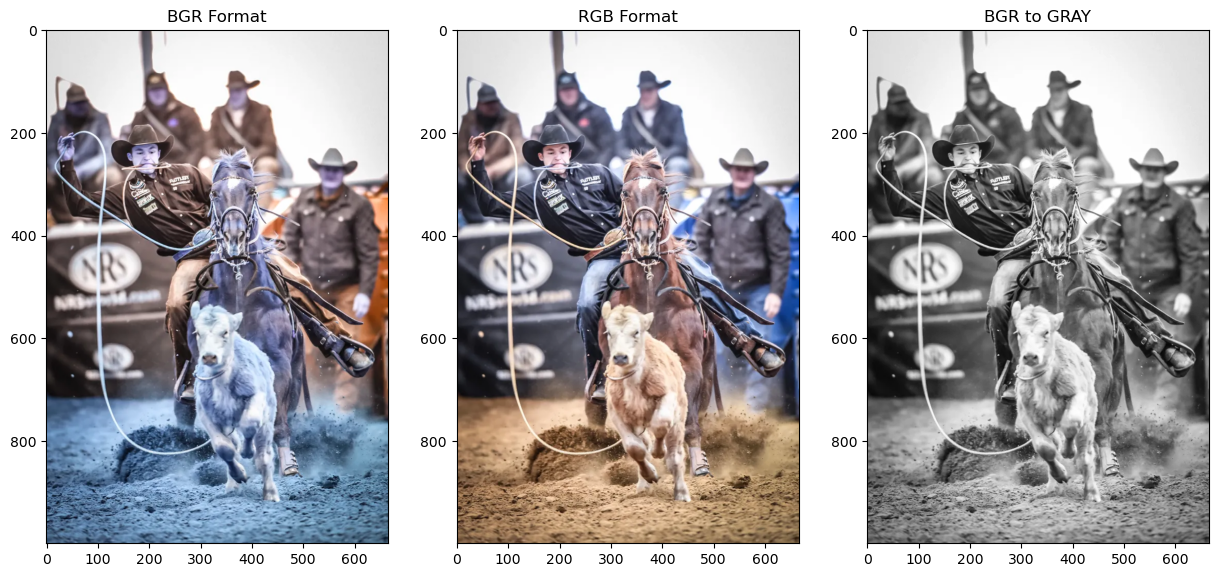

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()

imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

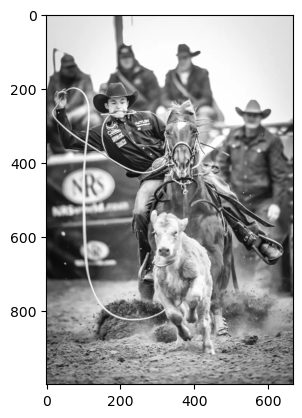

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

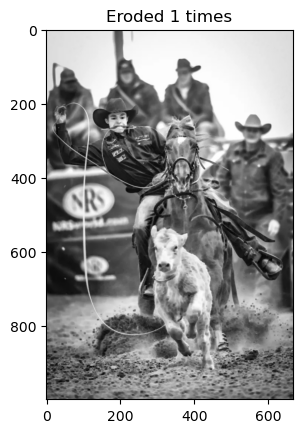

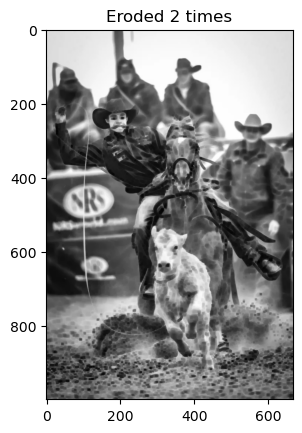

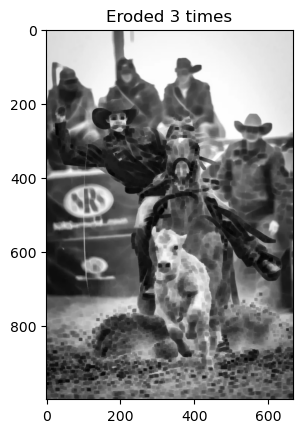

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

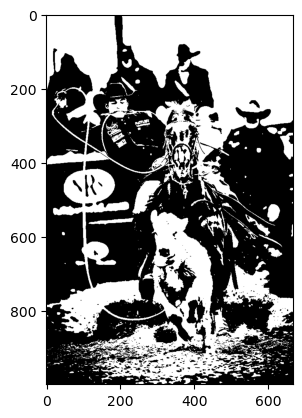

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

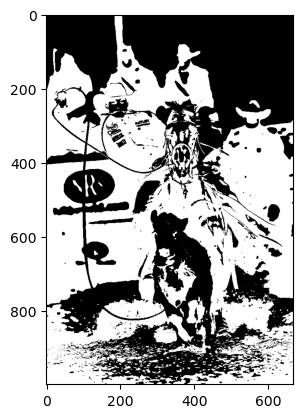

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


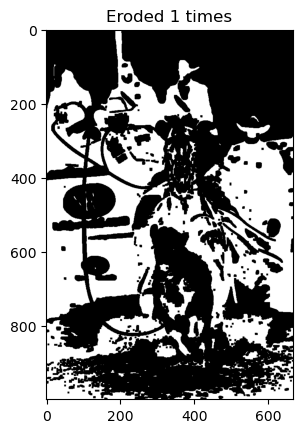

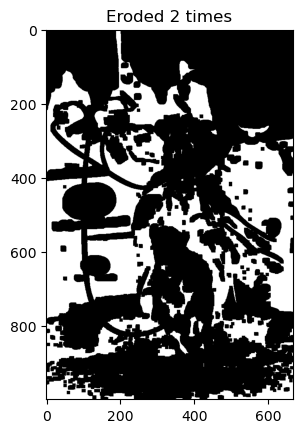

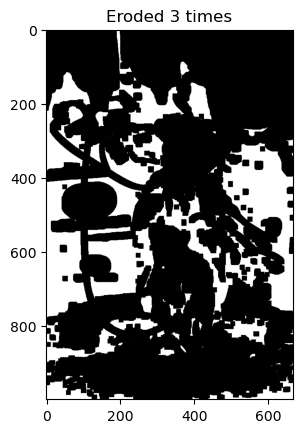

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

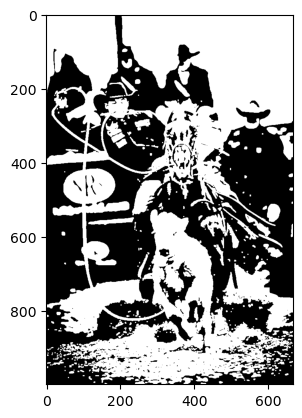

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


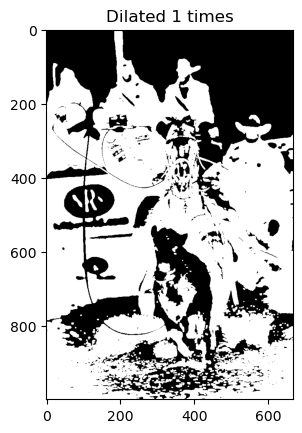

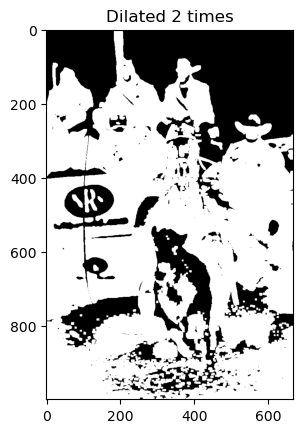

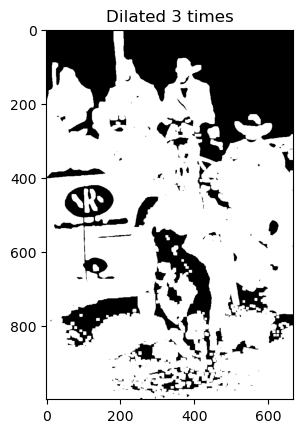

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

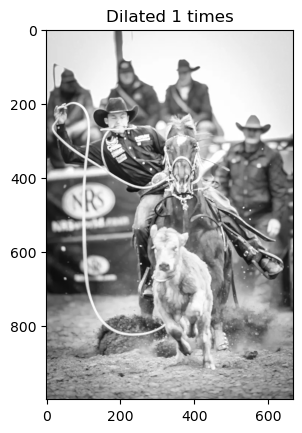

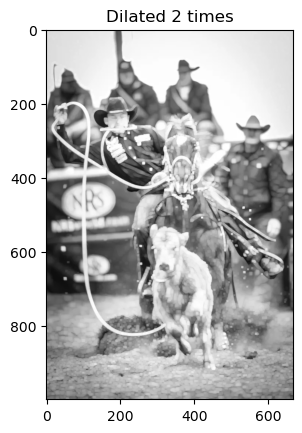

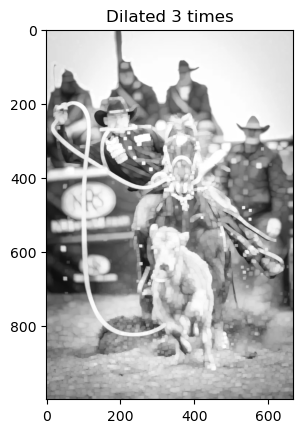

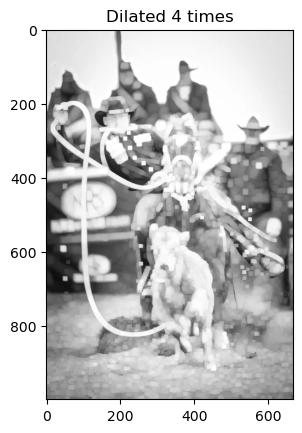

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


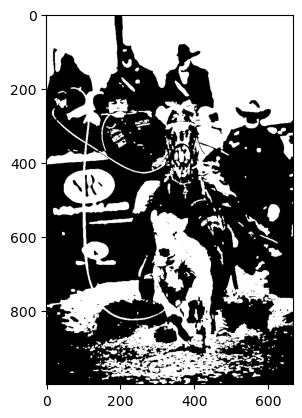

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

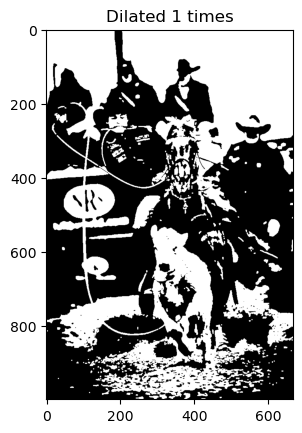

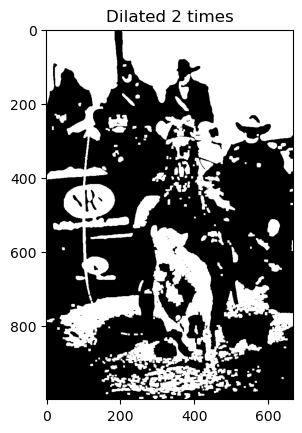

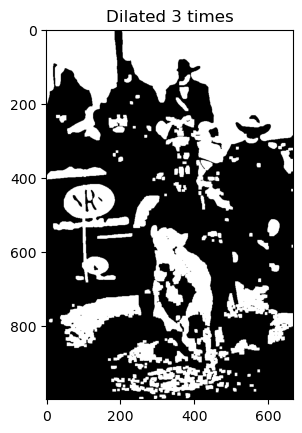

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

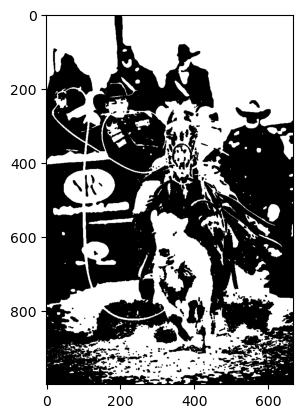

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

#print output
plt.imshow(closing,cmap='gray')
plt.show()

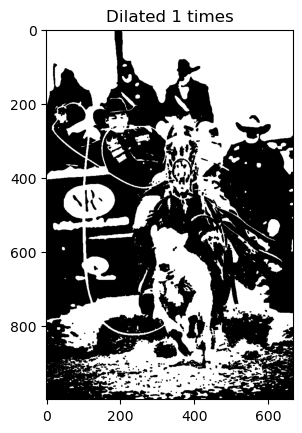

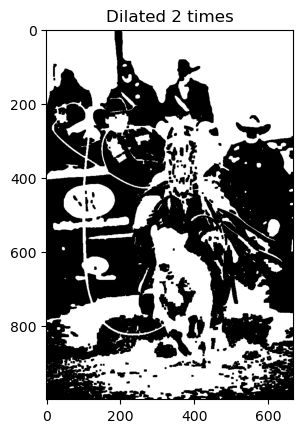

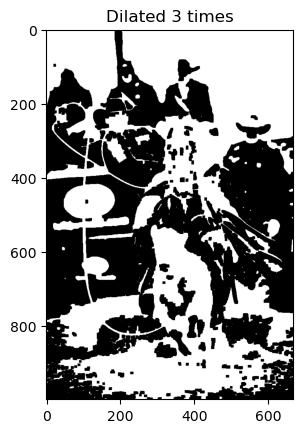

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

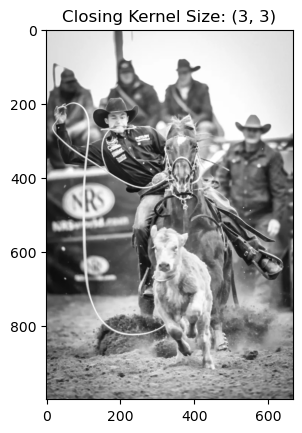

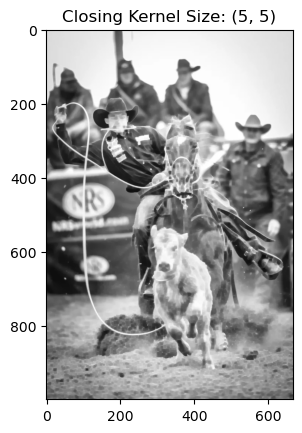

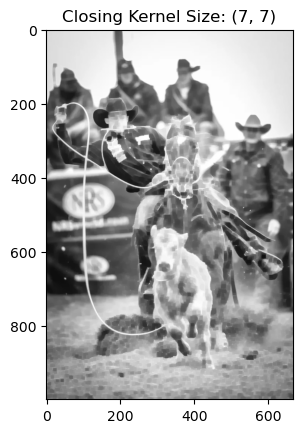

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

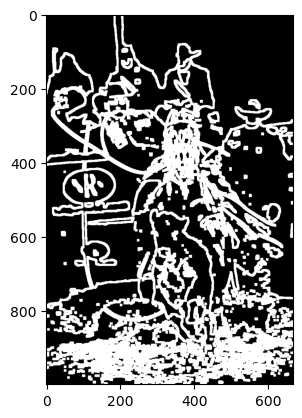

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

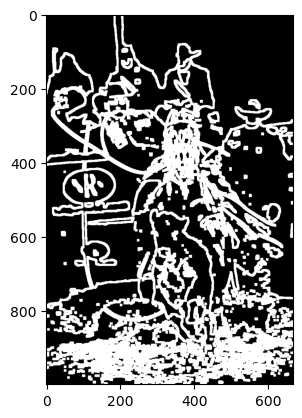

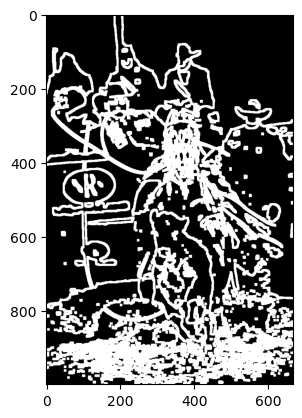

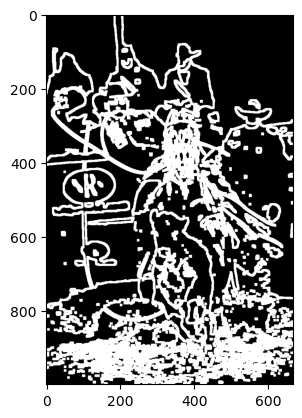

In [ ]:
for i in range(0,3):
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

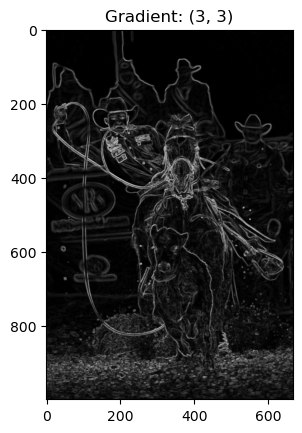

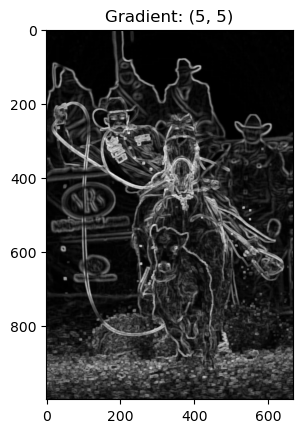

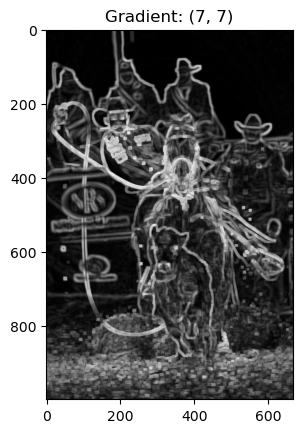

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

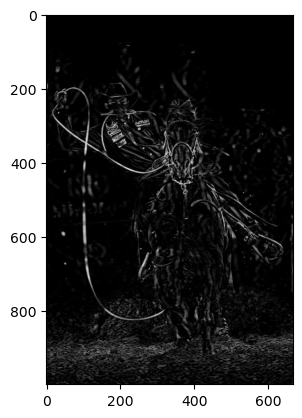

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


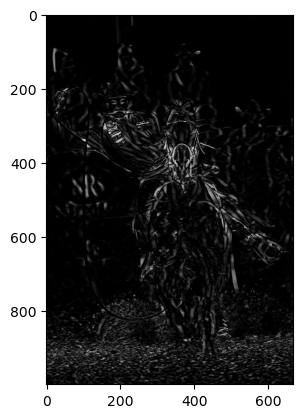

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

# Ejercicios <a class="anchor" id="ejercicios" ></a>

 ## a) Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab <a class="anchor" id="a" ></a>


# **Segmentación de Colonias Bacterianas mediante Erosión**

## **Aplicación**  
En imágenes microscópicas, la **erosión** se usa para eliminar ruido y separar estructuras celulares o bacterianas superpuestas, facilitando su segmentación y análisis.  

En este ejemplo, la **erosión morfológica** permitió segmentar mejor las colonias bacterianas con mayor número de estas. Al aplicar la erosión a la imagen binarizada, se eliminaron pequeños detalles y estructuras delgadas, dejando intactas solo aquellas colonias con un mayor tamaño y densidad.

## **¿Cómo se logró esto?**  
- La erosión funciona reduciendo el tamaño de los objetos en la imagen, eliminando píxeles en los bordes.  
- Como resultado, las colonias bacterianas más pequeñas o dispersas desaparecen, mientras que las más grandes y densas permanecen visibles.  
- Esto ayuda a segmentar únicamente las colonias más relevantes y a eliminar posibles ruidos o artefactos no deseados.  

En las imágenes generadas por el código, se puede observar claramente cómo la erosión mejora la segmentación de las colonias bacterianas más prominentes, facilitando su análisis.  




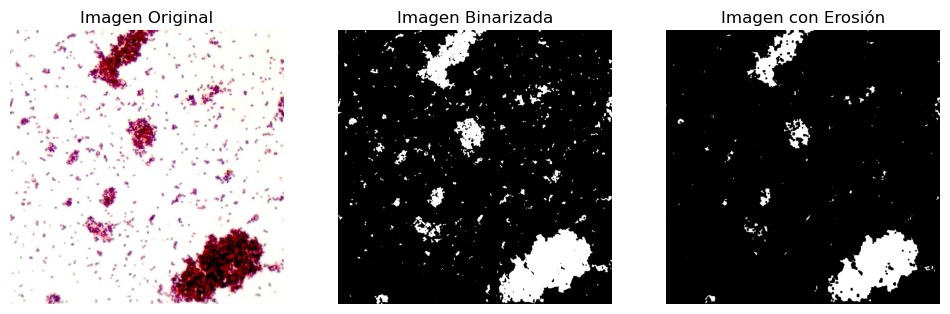

In [ ]:
# Leer la imagen
original = cv2.imread('bacterias.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

# Aplicar un umbral para binarizar la imagen (opcional, si ya es binaria puedes omitirlo)
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Definir el elemento estructurante (un kernel en forma de cruz)
kernel = np.ones((3,3), np.uint8)

# Aplicar erosión
erosion = cv2.erode(binary, kernel, iterations=2)

# Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Imagen Binarizada")
axes[1].axis("off")

axes[2].imshow(erosion, cmap='gray')
axes[2].set_title("Imagen con Erosión")
axes[2].axis("off")

plt.show()


## b) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab <a class="anchor" id="b" ></a>

# **Mejora en la Distingibilidad de Caracteres mediante Dilatación**
## **Aplicación**
La **dilatación** es una técnica de procesamiento de imágenes que expande las áreas de interés en una imagen binarizada, mejorando significativamente la legibilidad de los caracteres en documentos antiguos.

## **¿Cómo se logró esto?**  

1. **Imagen Original:**
   - Los caracteres pueden estar **desgastados** y **borrosos**, dificultando su lectura.
   - **Ruido** e **imperfecciones** en la digitalización pueden hacer que algunos caracteres sean difíciles de distinguir.

2. **Efecto de la Dilatación:**
   - La dilatación **expande** las áreas blancas (caracteres), **rellenando espacios vacíos** y **conectando partes rotas**.
   - Esto mejora la **definición** de los caracteres, haciendo que sean más completos y legibles.

3. **Resultados:**
   - Después de aplicar la dilatación, los caracteres se ven más **nítidos** y **claros**, facilitando su identificación.
   - Esto es útil para sistemas de **Reconocimiento Óptico de Caracteres (OCR)** y para preservar la información de documentos antiguos.


La dilatación ayuda a restaurar la legibilidad de textos en documentos antiguos, permitiendo una lectura más fácil y precisa, lo cual es crucial para la digitalización y conservación de información histórica.


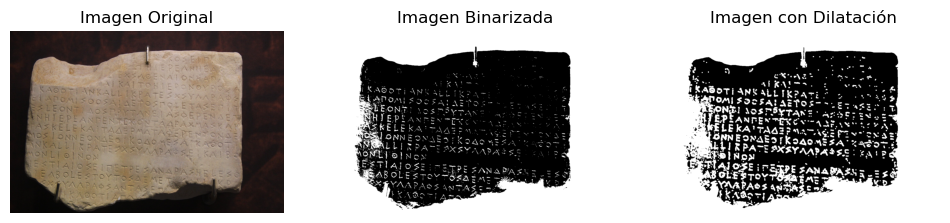

In [ ]:
# Leer la imagen
original = cv2.imread('antiguo.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

# Aplicar un umbral para binarizar la imagen
_, binary = cv2.threshold(gray, 117, 255, cv2.THRESH_BINARY_INV)

# Definir el elemento estructurante (un kernel en forma de cruz)
kernel = np.ones((3, 3), np.uint8)  # Ajusta el tamaño del kernel según sea necesario

# Aplicar dilatación
dilated = cv2.dilate(binary, kernel, iterations=2)

# Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Imagen Binarizada")
axes[1].axis("off")

axes[2].imshow(dilated, cmap='gray')
axes[2].set_title("Imagen con Dilatación")
axes[2].axis("off")

plt.show()


## c) Investigar una aplicación de opening y closing e implementalo en Google Colab <a class="anchor" id="c" ></a>

# **Eliminación de Ruido con Opening en Imágenes de Metalografía**

## **Aplicación**

La operación de **opening** es esencial en el análisis de imágenes de metalografía, especialmente para evaluar la calidad de los metales en aplicaciones de construcción. A continuación se presentan los beneficios clave:

## **¿Cómo se logró esto?**  

#### **1. Mejora de la Calidad de la Imagen**
- **Eliminación de Ruido:** El opening elimina pequeñas imperfecciones y partículas no deseadas, resaltando las estructuras relevantes del metal.
- **Enfoque en Estructuras:** Permite visualizar claramente la microestructura, como los granos y fases, fundamentales para el análisis del material.

#### **2. Segmentación y Análisis**
- **Separación de Estructuras:** Facilita la segmentación de granos metálicos, lo que ayuda en el análisis cuantitativo de sus características.
- **Identificación de Defectos:** Ayuda a detectar irregularidades y defectos en la microestructura, lo que puede indicar problemas en la fabricación.

#### **3. Comprensión de Propiedades del Material**
- **Relación Microestructura-Propiedades:** Permite relacionar la microestructura con las propiedades mecánicas, crucial para determinar el rendimiento del metal en construcción.
- **Selección de Materiales:** Facilita la elección de metales adecuados para cumplir con los estándares de seguridad y durabilidad.

El opening mejora la calidad de las imágenes metalográficas al eliminar ruido, lo que permite un análisis más preciso de la microestructura de los metales. Esto es vital para garantizar la calidad y seguridad de los materiales utilizados en la construcción.



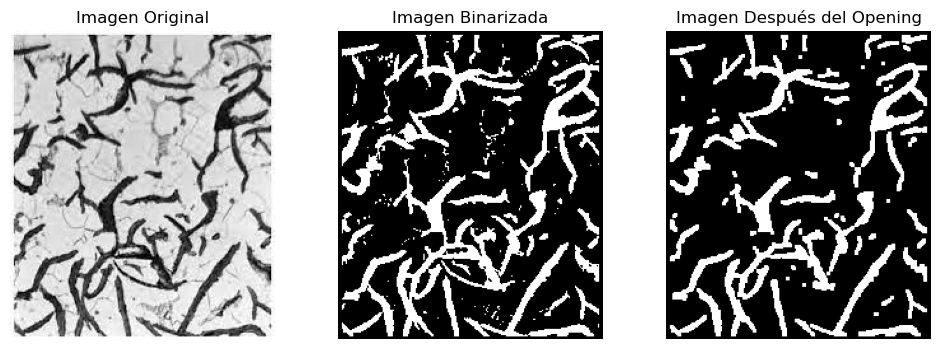

In [ ]:
# Leer la imagen de materiales
original = cv2.imread('metal.jpeg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

# Aplicar un umbral para binarizar la imagen
_, binary = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)

# Definir el elemento estructurante (kernel)
kernel = np.ones((3, 3), np.uint8)  # Ajusta el tamaño del kernel según sea necesario

# Aplicar la operación de opening para eliminar ruido
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Imagen Binarizada")
axes[1].axis("off")

axes[2].imshow(opening, cmap='gray')
axes[2].set_title("Imagen Después del Opening")
axes[2].axis("off")

plt.show()

# Uso de Closing para completar lineas

El **closing** ayuda a completar líneas interrumpidas y mejorar la legibilidad del autógrafo al rellenar huecos sin distorsionar la firma.  

## **¿Cómo se logró esto?**  
- **Rellena espacios en los trazos**, restaurando la continuidad de las letras.  
- **Reduce el ruido**, preservando la forma original del autógrafo.  
- **Mejora la segmentación**, facilitando el análisis o reconocimiento digital (OCR).  

Al aplicar **closing** tras binarizar la imagen, el autógrafo se vuelve más claro y legible, ideal para restauración o procesamiento digital.


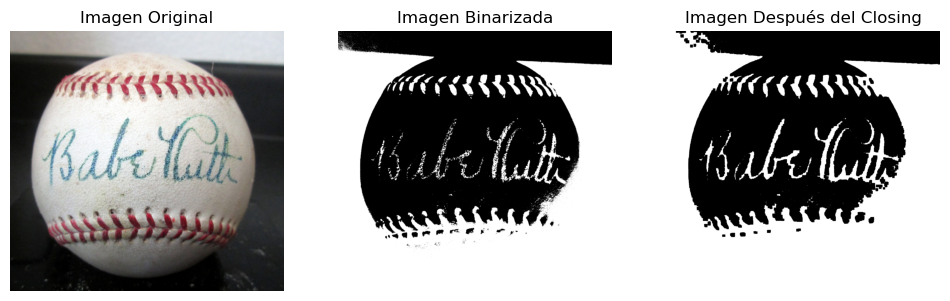

In [ ]:
# Leer la imagen médica
original = cv2.imread('baseball.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

# Aplicar un umbral para binarizar la imagen
_, binary = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)

# Definir el elemento estructurante (kernel)
kernel = np.ones((9, 9), np.uint8)  # Ajusta el tamaño del kernel según sea necesario

# Aplicar la operación de closing para unir estructuras
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=3)

# Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Imagen Binarizada")
axes[1].axis("off")

axes[2].imshow(closing, cmap='gray')
axes[2].set_title("Imagen Después del Closing")
axes[2].axis("off")


plt.show()